In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [2]:
df = pd.read_csv("data/data_pp.csv")
df = df[["Name", "Description", "Target"]]
# Getting only columns that includes text
df.head(5)

,Name,Description,Target
0,Geometry Dash Lite,Jump and fly your way through danger in this r...,35.200000
1,Fastlane: Road to Revenge,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,32.200000
2,Esports Life Tycoon | Manage your esports team,Manage your own esports team. Sign up the best...,12.000000
3,Armello,Armello is a grand swashbuckling adventure com...,25.645365
4,Adventure Bay - Paradise Farm,Welcome to your very own exotic cove! Adventur...,24.505571


# Meta Features

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))

## Name

In [4]:
# word_count
df['name_word_count'] = df['Name'].apply(lambda x: len(str(x).split()))

# unique_word_count
df['name_unique_word_count'] = df['Name'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df['name_stop_word_count'] = df['Name'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

# mean_word_length
df['name_mean_word_length'] = df['Name'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df['name_char_count'] = df['Name'].apply(lambda x: len(str(x)))

# punctuation_count
df['name_punctuation_count'] = df['Name'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

## Description

In [5]:
df['desc_word_count'] = df['Description'].apply(lambda x: len(str(x).split()))

# unique_word_count
df['desc_unique_word_count'] = df['Description'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df['desc_stop_word_count'] = df['Description'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

# mean_word_length
df['desc_mean_word_length'] = df['Description'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df['desc_char_count'] = df['Description'].apply(lambda x: len(str(x)))

# punctuation_count
df['desc_punctuation_count'] = df['Description'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

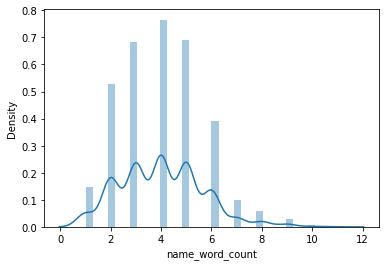

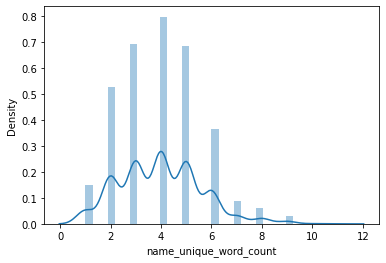

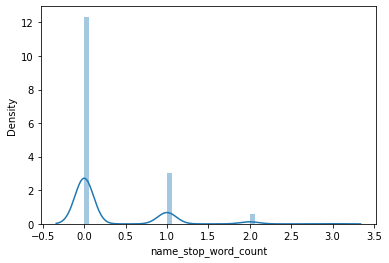

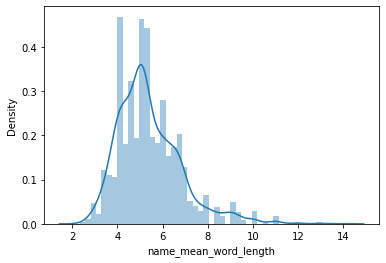

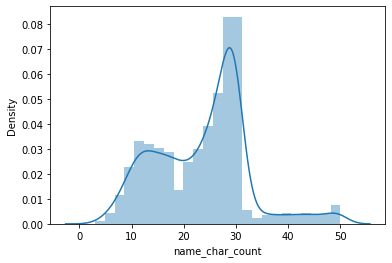

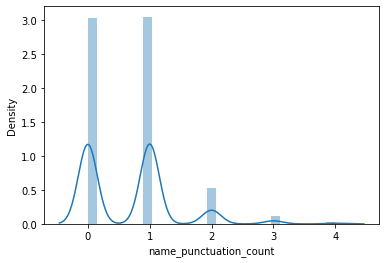

In [6]:
METAFEATURES = ['name_word_count', 'name_unique_word_count', 'name_stop_word_count', 'name_mean_word_length','name_char_count', 'name_punctuation_count']

for column in METAFEATURES:
    plt.figure()           
    sns.distplot(df[column])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

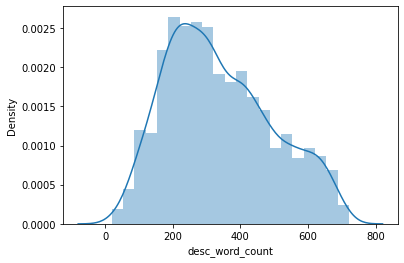

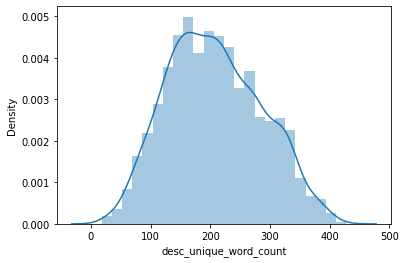

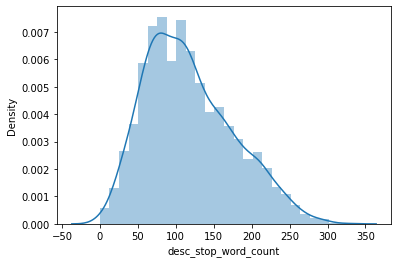

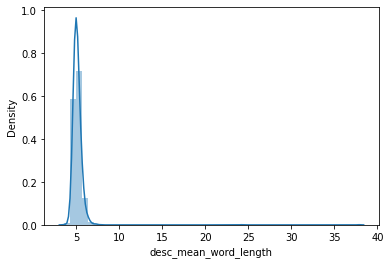

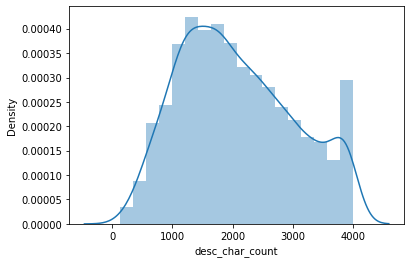

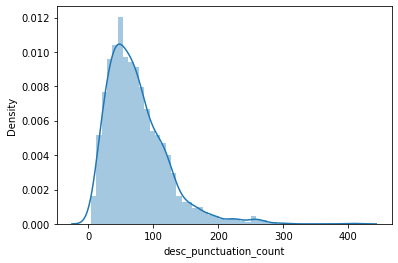

In [7]:
METAFEATURES = ['desc_word_count', 'desc_unique_word_count', 'desc_stop_word_count', 'desc_mean_word_length','desc_char_count', 'desc_punctuation_count']
for column in METAFEATURES:
    plt.figure()           
    sns.distplot(df[column])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    2369 non-null   object 
 1   Description             2369 non-null   object 
 2   Target                  2369 non-null   float64
 3   name_word_count         2369 non-null   int64  
 4   name_unique_word_count  2369 non-null   int64  
 5   name_stop_word_count    2369 non-null   int64  
 6   name_mean_word_length   2369 non-null   float64
 7   name_char_count         2369 non-null   int64  
 8   name_punctuation_count  2369 non-null   int64  
 9   desc_word_count         2369 non-null   int64  
 10  desc_unique_word_count  2369 non-null   int64  
 11  desc_stop_word_count    2369 non-null   int64  
 12  desc_mean_word_length   2369 non-null   float64
 13  desc_char_count         2369 non-null   int64  
 14  desc_punctuation_count  2369 non-null   

# Text Preprocessing

In [9]:
# Remove stopwords & convert to lower case
df['Name'] = df['Name'].apply(lambda x: ' '.join([w for w in str(x).lower().split() if w not in stop_words]))
df['Description'] = df['Description'].apply(lambda x: ' '.join([w for w in str(x).lower().split() if w not in stop_words]))

# Remove Punctuations
df["Name"] = df['Name'].str.replace('[^\w\s]','')
df["Description"] = df['Description'].str.replace('[^\w\s]','')

df.tail()

/var/folders/_l/048d7_xs4nq8m4g2753wq9bc0000gn/T/ipykernel_9156/360020838.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Name"] = df['Name'].str.replace('[^\w\s]','')
/var/folders/_l/048d7_xs4nq8m4g2753wq9bc0000gn/T/ipykernel_9156/360020838.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Description"] = df['Description'].str.replace('[^\w\s]','')


,Name,Description,Target,name_word_count,name_unique_word_count,name_stop_word_count,name_mean_word_length,name_char_count,name_punctuation_count,desc_word_count,desc_unique_word_count,desc_stop_word_count,desc_mean_word_length,desc_char_count,desc_punctuation_count
2364,altos odyssey,beyond horizon sits majestic desert vast unexp...,31.500000,2,2,0,6.500000,14,1,299,206,105,5.130435,1832,57
2365,trucker real wheels simulator,take role trucker transport various cargoes ea...,26.600000,5,5,0,5.400000,31,1,287,172,108,4.867596,1683,57
2366,random dice wars,send dice army war realtime simple fun easy s...,22.795880,3,3,0,5.000000,17,1,303,194,67,5.788779,2056,146
2367,battle racing stars multiplayer games,battle racing stars new halfbrick studios game...,28.200000,6,6,0,5.666667,39,1,67,57,24,5.328358,423,23
2368,farmville 3 animals,start animal farm ground breeding building thr...,29.475468,4,4,0,4.500000,21,1,594,318,204,5.037037,3585,129


In [10]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/erenkotar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df['token_name']=df['Name'].apply(lambda X: word_tokenize(X))
df['token_desc'] = df['Description'].apply(lambda X: word_tokenize(X))
df.head(2)

,Name,Description,Target,name_word_count,name_unique_word_count,name_stop_word_count,name_mean_word_length,name_char_count,name_punctuation_count,desc_word_count,desc_unique_word_count,desc_stop_word_count,desc_mean_word_length,desc_char_count,desc_punctuation_count,token_name,token_desc
0,geometry dash lite,jump fly way danger rhythmbased action platfor...,35.2,3,3,0,5.333333,18,0,114,83,36,5.271930,714,20,"[geometry, dash, lite]","[jump, fly, way, danger, rhythmbased, action, ..."
1,fastlane road revenge,took city shouldve taken car reclaim no1 posit...,32.2,4,4,1,5.500000,25,1,241,186,72,5.804979,1639,119,"[fastlane, road, revenge]","[took, city, shouldve, taken, car, reclaim, no..."


In [12]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/erenkotar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/erenkotar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Text Normalization

## Lemmatization

In [13]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

df["token_name"] = df["token_name"].apply(lemmatize_text)
df["token_desc"] = df["token_desc"].apply(lemmatize_text)

In [14]:
df.head(3)

,Name,Description,Target,name_word_count,name_unique_word_count,name_stop_word_count,name_mean_word_length,name_char_count,name_punctuation_count,desc_word_count,desc_unique_word_count,desc_stop_word_count,desc_mean_word_length,desc_char_count,desc_punctuation_count,token_name,token_desc
0,geometry dash lite,jump fly way danger rhythmbased action platfor...,35.2,3,3,0,5.333333,18,0,114,83,36,5.271930,714,20,"[geometry, dash, lite]","[jump, fly, way, danger, rhythmbased, action, ..."
1,fastlane road revenge,took city shouldve taken car reclaim no1 posit...,32.2,4,4,1,5.500000,25,1,241,186,72,5.804979,1639,119,"[fastlane, road, revenge]","[took, city, shouldve, taken, car, reclaim, no..."
2,esports life tycoon manage esports team,manage esports team sign best players train su...,12.0,8,8,1,4.875000,46,1,471,288,184,5.180467,2910,64,"[esports, life, tycoon, manage, esports, team]","[manage, esports, team, sign, best, player, tr..."


In [15]:
# df.to_csv('data/data_text.csv', index=False)

-----

df = pd.read_csv('data/data_text.csv')

## Train-Test Split
Load index

In [ ]:
import pickle

In [17]:
# load splitted indexes
with open('data/split_dict.pkl', 'rb') as f:
    split_dict = pickle.load(f)

train_ids: 1731
test_ids: 473
val_ids: 236


In [19]:
X = df.drop(['Target'], axis=1)
y = df[['Target']]

X_train = X.loc[split_dict['train'],:]
X_test = X.loc[split_dict['test'],:]
X_val = X.loc[split_dict['val'],:]

y_train = y.loc[split_dict['train']]
y_test = y.loc[split_dict['test']]
y_val = y.loc[split_dict['val']]

# Model Architecture

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2023-11-05 00:26:03.901359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
X_train = X_train.token_desc.values
X_test = X_test.token_desc.values
X_val = X_val.token_desc.values

In [22]:
OOV_TOKEN = '<OOV>' # for out of vocabulary words
VOCAB_SIZE = 10000
MAX_LEN = 200
EMBEDDING_DIM = 100

tokenizer = Tokenizer(
    num_words=VOCAB_SIZE,
    oov_token=OOV_TOKEN
)

tokenizer.fit_on_texts(X_train)

In [23]:
train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(
    train_seq, maxlen=MAX_LEN, dtype='int32', padding='post',
    truncating='post'
)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(
    test_seq, maxlen=MAX_LEN, dtype='int32', padding='post',
    truncating='post'
)

val_seq = tokenizer.texts_to_sequences(X_val)
val_padded = pad_sequences(
    test_seq, maxlen=MAX_LEN, dtype='int32', padding='post',
    truncating='post'
)

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalMaxPooling1D

input_text = Input(shape=(MAX_LEN,))

embedding = Embedding(VOCAB_SIZE, EMBEDDING_DIM, name='Embedding', input_length=MAX_LEN)(input_text)
dropoutEmb = Dropout(0.25)(embedding)

# lstm1 = LSTM(128, return_sequences=False)(dropoutEmb)
# dropoutLstm1 = Dropout(0.3)(lstm1)

lstm1 = LSTM(128, return_sequences=True)(dropoutEmb)
dropoutLstm1 = Dropout(0.3)(lstm1)
global_pool = GlobalMaxPooling1D()(dropoutLstm1)

dense1 = Dense(512, activation='relu')(global_pool)
dropoutD1 = Dropout(0.65)(dense1)

dense2 = Dense(256, activation='relu')(dropoutD1)
dropoutD2 = Dropout(0.65)(dense2)

output = Dense(1)(dropoutD2) 
 
model = Model(inputs=input_text, outputs=output)
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_percentage_error'])

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 Embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 dropout_4 (Dropout)         (None, 200, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 200, 128)          117248    
                                                                 
 dropout_5 (Dropout)         (None, 200, 128)          0         
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                           

In [29]:
es_cb = EarlyStopping(patience=6, 
                   monitor='loss', 
                   restore_best_weights=True, 
                   mode='min', 
                   verbose=1)

In [30]:
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime
# tensorboard --logdir logs/fit

log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb_cb = TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch='500,520')

2023-11-05 00:32:22.668211: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-11-05 00:32:22.668231: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-11-05 00:32:22.668776: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


In [31]:
hist = model.fit(
    train_padded,
    y = y_train,
    validation_data=(val_padded, y_test),
    epochs=25,
    callbacks=[es_cb, tb_cb]
)

Epoch 1/25
55/55 [==============================] - 15s 190ms/step - loss: 185.6785 - mean_absolute_percentage_error: 38.7404 - val_loss: 79.5970 - val_mean_absolute_percentage_error: 27.7147
Epoch 2/25
55/55 [==============================] - 10s 186ms/step - loss: 47.1146 - mean_absolute_percentage_error: 21.7322 - val_loss: 91.0504 - val_mean_absolute_percentage_error: 30.0513
Epoch 3/25
55/55 [==============================] - 9s 171ms/step - loss: 44.3868 - mean_absolute_percentage_error: 21.1999 - val_loss: 77.3014 - val_mean_absolute_percentage_error: 27.1873
Epoch 4/25
55/55 [==============================] - 9s 162ms/step - loss: 42.5541 - mean_absolute_percentage_error: 20.7254 - val_loss: 110.6725 - val_mean_absolute_percentage_error: 33.9281
Epoch 5/25
55/55 [==============================] - 9s 162ms/step - loss: 36.4460 - mean_absolute_percentage_error: 19.1709 - val_loss: 109.2388 - val_mean_absolute_percentage_error: 33.7601
Epoch 6/25
55/55 [===========================

2023-11-05 00:33:57.209692: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-11-05 00:33:57.209727: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


24/55 [============>.................] - ETA: 6s - loss: 28.6051 - mean_absolute_percentage_error: 15.9525

2023-11-05 00:34:03.194923: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-11-05 00:34:04.089940: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-11-05 00:34:04.090605: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: logs/fit/20231105-003222/plugins/profile/2023_11_05_00_34_04/EreNecibs-Macbook.local.xplane.pb


55/55 [==============================] - 13s 243ms/step - loss: 26.5487 - mean_absolute_percentage_error: 15.6288 - val_loss: 109.4975 - val_mean_absolute_percentage_error: 33.7891
Epoch 11/25
55/55 [==============================] - 10s 174ms/step - loss: 25.7528 - mean_absolute_percentage_error: 15.2806 - val_loss: 92.8989 - val_mean_absolute_percentage_error: 30.4154
Epoch 12/25
55/55 [==============================] - 11s 195ms/step - loss: 23.8840 - mean_absolute_percentage_error: 14.7916 - val_loss: 89.2426 - val_mean_absolute_percentage_error: 29.6921
Epoch 13/25
55/55 [==============================] - 11s 196ms/step - loss: 24.3896 - mean_absolute_percentage_error: 15.0600 - val_loss: 105.7908 - val_mean_absolute_percentage_error: 32.9756
Epoch 14/25
55/55 [==============================] - 11s 191ms/step - loss: 22.3509 - mean_absolute_percentage_error: 14.1755 - val_loss: 105.8751 - val_mean_absolute_percentage_error: 33.0270
Epoch 15/25
55/55 [==============================

## Visualize training history

In [32]:
best_epoch = np.argmin(hist.history['val_loss']) + 1

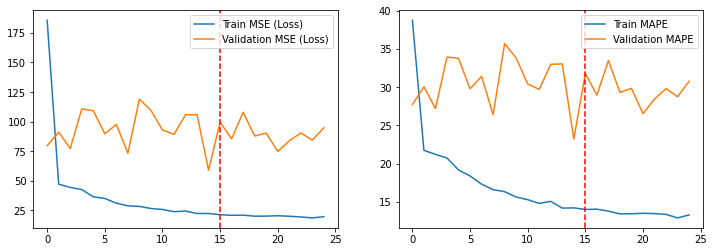

In [33]:
# plot loss and mape and put mark the best epoch
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Train MSE (Loss)')
plt.plot(hist.history['val_loss'], label='Validation MSE (Loss)')
plt.axvline(x=best_epoch, color='r', linestyle='--')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['mean_absolute_percentage_error'], label='Train MAPE')
plt.plot(hist.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
plt.axvline(x=best_epoch, color='r', linestyle='--')
plt.legend()
plt.show()

# Save Model & Tokens & Split Index

In [34]:
model_dict = {
    'sequences': {
        'train': train_seq,
        'test': test_seq,
        'val': val_seq
    },
    'padded': {
        'train': train_padded,
        'test': test_padded,
        'val': val_padded
    },
    # 'model': {
    #     'model': model,
    #     'history': hist
    # },
    'tokenizer': tokenizer,
    'vocab_size': VOCAB_SIZE,
    'max_len': MAX_LEN,
    'embedding_dim': EMBEDDING_DIM,
    'oov_token': OOV_TOKEN,
    'best_epoch': best_epoch,
}

# dump model_dict
with open('models/model_dict.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

In [35]:
# Save the model as an H5 file
model.save('models/nlp_model.h5')

---

# Another approach by Eren KOTAR

In [30]:
import numpy as np
import pandas as pd

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from transformers import TFBertModel, BertTokenizer

# Loading pre-trained LLM (BERT)
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

c:\Users\erenk\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\erenk\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [31]:
df = pd.read_csv("data/data_pp.csv", index_col=0)
df.head(3)

,Name,Number_of_Rating,Genre,Price,Description,Updated,Size,Requires_Android,Content_Rating,Offered_By,...,last_update_ln,In_app_Products_Mean,Free_or_Not,Price_Segment,R_mean,G_mean,B_mean,R_std,G_std,B_std
ID,,,,,,,,,,,,,,,,,,,,,
0,Geometry Dash Lite,7227039,Arcade,0.00,Jump and fly your way through danger in this r...,2019-12-11,5.857981,4.0,1,RobTop Games,...,6.802395,0.0,1.0,0.0,109.975656,123.210478,55.596528,117.723707,78.084704,73.268847
1,Fastlane: Road to Revenge,621784,Action,0.00,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,2021-08-16,6.523562,4.4,2,Space Ape,...,5.655992,49.5,1.0,0.0,111.865795,123.851474,104.913302,78.302310,87.087182,76.248771
2,Esports Life Tycoon | Manage your esports team,309,Simulation,3.99,Manage your own esports team. Sign up the best...,2021-05-10,5.321928,4.4,1,UPLAY Online,...,5.950643,0.0,0.0,1.0,82.604599,77.480062,129.321636,73.164192,68.286013,71.654148


In [37]:
def encode_text(texts, tokenizer, max_len=256):
    tokens = tokenizer.batch_encode_plus(
        texts,
        max_length=max_len,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )
    return tokens['input_ids'], tokens['attention_mask']

In [44]:
a = df['Description'].values[0]
a_enc = encode_text(texts=a, tokenizer=tokenizer, max_len=256)

In [45]:
bert_model(a_enc)

In [ ]:
bert_output = bert_model(input_ids, attention_mask=attention_mask)
text_embeddings = bert_output.last_hidden_state[:, 0, :]

In [ ]:

def encode_text(texts, tokenizer, max_len=256):
    tokens = tokenizer.batch_encode_plus(
        texts,
        max_length=max_len,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )
    return tokens['input_ids'], tokens['attention_mask']

# Define the model
def build_model(num_integer_features, bert_model, hidden_units=[128, 64], output_units=1):
    # Input layers
    input_ids = Input(shape=(256,), dtype=tf.int32, name='input_ids')
    attention_mask = Input(shape=(256,), dtype=tf.int32, name='attention_mask')
    integer_features = Input(shape=(num_integer_features,), name='integer_features')
    
    # LLM for text embeddings
    bert_output = bert_model(input_ids, attention_mask=attention_mask)
    text_embeddings = bert_output.last_hidden_state[:, 0, :]
    
    # Concatenate embeddings with integer features
    concatenated = Concatenate()([text_embeddings, integer_features])
    
    # Feed-forward neural network
    x = concatenated
    for units in hidden_units:
        x = Dense(units, activation='relu')(x)
    output = Dense(output_units)(x)
    
    model = Model(inputs=[input_ids, attention_mask, integer_features], outputs=output)
    return model

# Let's assume you have 10 integer features
num_integer_features = 10
model = build_model(num_integer_features, bert_model)

model.compile(optimizer='adam', loss='mse')

# Dummy data
# Assuming you have the following data
texts = ["This is a great game!", "I didn't like this game."]
input_ids, attention_masks = encode_text(texts, tokenizer)
integer_features_data = np.random.randint(0, 100, size=(len(texts), num_integer_features))
output_data = np.random.random(size=(len(texts),))

# Train the model
model.fit([input_ids, attention_masks, integer_features_data], output_data, epochs=5)
